In [3]:
import random
from deap import base, creator, tools, algorithms

In [4]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [5]:
ind = creator.Individual([1, 0, 1, 1, 0])

print(ind)
print(type(ind))
print(type(ind.fitness))

[1, 0, 1, 1, 0]
<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMax'>


In [6]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [7]:
bit = toolbox.attr_bool()
ind = toolbox.individual()
pop = toolbox.population(n=3)

print("bit is of type %s and has value\n%s" % (type(bit), bit))
print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

bit is of type <class 'int'> and has value
1
ind is of type <class 'deap.creator.Individual'> and contains 10 bits
[0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
pop is of type <class 'list'> and contains 3 individuals
[[0, 0, 1, 1, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 0, 0, 1, 1, 0, 1], [0, 0, 1, 1, 1, 1, 0, 1, 1, 1]]


In [8]:
def evalOneMax(individual):
    return sum(individual),
     

In [9]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

In [10]:
ind = toolbox.individual()
print(ind)
toolbox.mutate(ind)
print(ind)

[1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 1]


In [11]:
mutant = toolbox.clone(ind)
print(mutant is ind)
print(mutant == ind)

False
True


In [12]:
def main():
    import numpy
    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

gen	nevals	avg 	min	max
0  	50    	4.72	2  	8  
1  	29    	5.9 	3  	8  
2  	28    	6.74	4  	8  
3  	29    	7.38	5  	9  
4  	33    	7.82	6  	9  
5  	31    	8.26	6  	10 
6  	27    	8.98	7  	10 
7  	22    	9.18	7  	10 
8  	32    	9.54	6  	10 
9  	35    	9.6 	6  	10 
10 	27    	9.9 	8  	10 
Best individual is: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
with fitness: (10.0,)


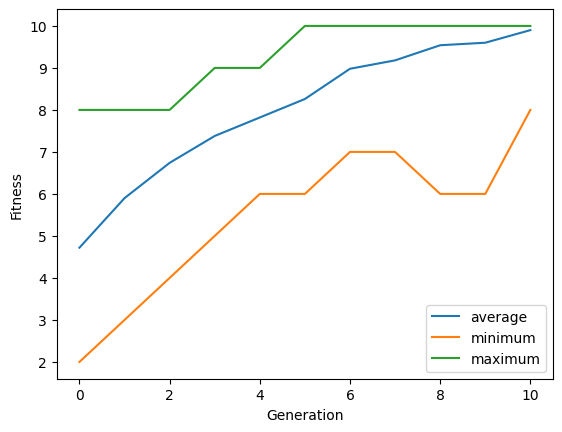

In [14]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()